In [1]:
from hyss_util import *
import numpy as np
import pandas as pd
import os

In [2]:
# -- load all spec templates/waves/names 
specs = np.load("../output/graham_hall_upload/lspdd_noaa_lab_spectra.npy")
names = np.load("../output/graham_hall_upload/lspdd_noaa_lab_spectra_name.npy")
wavelengths = np.load("../output/graham_hall_upload/lspdd_lab_spectra_wavelengths.npy")

wave = np.round(wavelengths/1000, 2)



In [4]:
wave.max()

0.9

In [3]:
# -- standardize lab spectra data
spectra_st = np.empty(specs.shape)
for i in range(0, len(specs)):
  st = (specs[i] - specs[i].mean()) / specs[i].std()
  spectra_st[i, :] = st

In [4]:
# -- standardize lab spectra data
spectra_st = np.empty(specs.shape)
for i in range(0, len(specs)):
  st = (specs[i] - specs[i].min()) / (specs[i].max()-specs[i].min())
  spectra_st[i, :] = st

Text(1.0, 1.0, 'High Pressure Sodium')

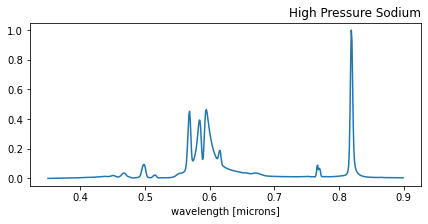

In [19]:
plt.subplots(figsize=[7, 3])
plt.plot(wavelengths/1000, spectra_st[270])
plt.xlabel('wavelength [microns]')
plt.title('High Pressure Sodium', loc='right' )


Text(1.0, 1.0, 'LED')

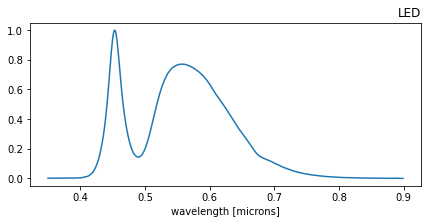

In [20]:
plt.subplots(figsize=[7, 3])
plt.plot(wavelengths/1000, spectra_st[273])
plt.xlabel('wavelength [microns]')
plt.title('LED', loc='right' )

Text(1.0, 1.0, 'Metal Halide')

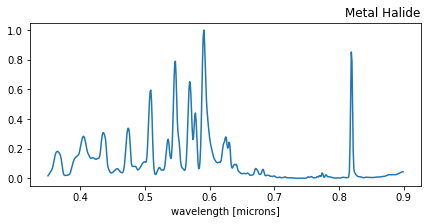

In [33]:
plt.subplots(figsize=[7, 3])
plt.plot(wavelengths/1000, spectra_st[279])
plt.xlabel('wavelength [microns]')
plt.title('Metal Halide', loc='right' )

Text(1.0, 1.0, 'Fluorescent')

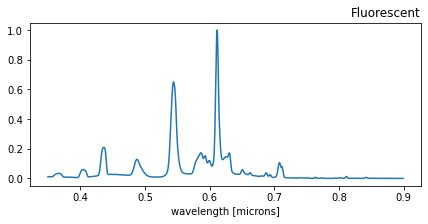

In [36]:
plt.subplots(figsize=[7, 3])
plt.plot(wavelengths/1000, spectra_st[267])
plt.xlabel('wavelength [microns]')
plt.title('Fluorescent', loc='right' )

In [35]:
names[267]

'Fluorescent 3000 K'

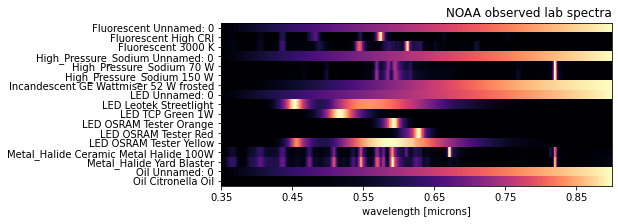

In [26]:
# -- imshow NOAA templates
fig, ax = plt.subplots(figsize=[7, 3])
ax.imshow(spectra_st[265:283], aspect="auto", cmap="magma", interpolation="nearest")
ax.set_xticks(np.arange(0, len(wave), 100))
ax.set_xticklabels(wave[::100])
ax.set_yticks(np.arange(len(names[265:283])))
ax.set_yticklabels(names[265:283])
ax.set_xlabel('wavelength [microns]')
ax.set_title("NOAA observed lab spectra", loc='right' )
fig.show()

In [5]:
# -- filter spec that has a high auto-correlation
# -- get the lspdd spec and names 
lspdd_spec = spectra_st[:265].T
lspdd_name = names[:265]
lspdd_spec.shape

# -- Convert feature matrix into DataFrame
df = pd.DataFrame(specs[:265].T)

# -- Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

# -- Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/tmp/ipykernel_875731/2831318387.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,NaN,0.608285,0.069351,0.037230,0.000016,0.044269,0.037967,0.005251,0.024060,0.075173,...,0.119442,0.004003,0.175044,0.213968,0.109171,0.170684,0.146002,0.042943,0.087654,0.189843
1,NaN,NaN,0.041732,0.076339,0.111431,0.068083,0.076579,0.105651,0.089161,0.035199,...,0.158825,0.063611,0.170533,0.194010,0.133808,0.165517,0.165210,0.074199,0.104266,0.241360
2,NaN,NaN,NaN,0.997593,0.985431,0.998372,0.997244,0.988316,0.994639,0.999820,...,0.131738,0.107132,0.089554,0.004311,0.208370,0.078008,0.186090,0.009938,0.046781,0.130501
3,NaN,NaN,NaN,NaN,0.993062,0.999727,0.999806,0.995030,0.998830,0.996514,...,0.160475,0.098333,0.112292,0.021195,0.231758,0.101404,0.212645,0.020821,0.051413,0.148975
4,NaN,NaN,NaN,NaN,NaN,0.993067,0.993410,0.999596,0.997265,0.982481,...,0.183274,0.049663,0.138616,0.054081,0.249903,0.128283,0.237045,0.047409,0.076276,0.177123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.965029,0.008978,0.033567,0.119268
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006357,0.020805,0.134680
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324975,0.126039
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167711


In [6]:
# -- Find index of feature columns with correlation value greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# -- Drop lighting technologies that we don't need 
lspdd_col = df.drop(df[to_drop], axis=1)
lspdd_col

,0,1,2,48,49,50,59,118,230,231,234,249,256,262,263,264
0,0.000002,0.0,0.001986,0.000015,0.000338,0.0,0.000000,0.0,0.000164,0.000000,0.0,0.000000,0.000040,9.0,4.0,1.0
1,0.000003,0.0,0.002022,0.000000,0.000177,0.0,0.000000,0.0,0.000113,0.000000,0.0,0.000000,0.000472,1.0,3.0,1.0
2,0.000007,0.0,0.002057,0.000000,0.000243,0.0,0.000000,0.0,0.000084,0.000000,0.0,0.000000,0.000213,1.0,1.0,1.0
3,0.000010,0.0,0.002131,0.000036,0.000411,0.0,0.000189,0.0,0.000166,0.000000,0.0,0.000000,0.000000,9.0,4.0,1.0
4,0.000011,0.0,0.002171,0.000074,0.000482,0.0,0.000410,0.0,0.000312,0.000000,0.0,0.000000,0.000000,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.000162,0.0,0.126270,0.001230,0.003169,0.0,0.000018,0.0,0.000000,0.005300,0.0,0.000000,0.000483,1.0,0.0,0.0
546,0.000145,0.0,0.127370,0.000000,0.004028,0.0,0.001492,0.0,0.000080,0.002638,0.0,0.000391,0.000000,1.0,1.0,0.0
547,0.000000,0.0,0.127060,0.000000,0.003608,0.0,0.000401,0.0,0.000401,0.005052,0.0,0.000000,0.002590,0.0,5.0,0.0
548,0.000000,0.0,0.127670,0.000000,0.004099,0.0,0.002330,0.0,0.001121,0.006979,0.0,0.000000,0.000000,1.0,1.0,0.0


In [7]:
# -- get index of lspdd 
index_lspdd = lspdd_col.columns

# -- extrat raw and standard spec and their names
spec_keep = []
name_keep = []
spec_lspdd_st = []

for num in index_lspdd:
  spec_keep.append((specs[:265])[num])
  spec_lspdd_st.append((lspdd_spec.T)[num])
  name_keep.append((lspdd_name)[num])

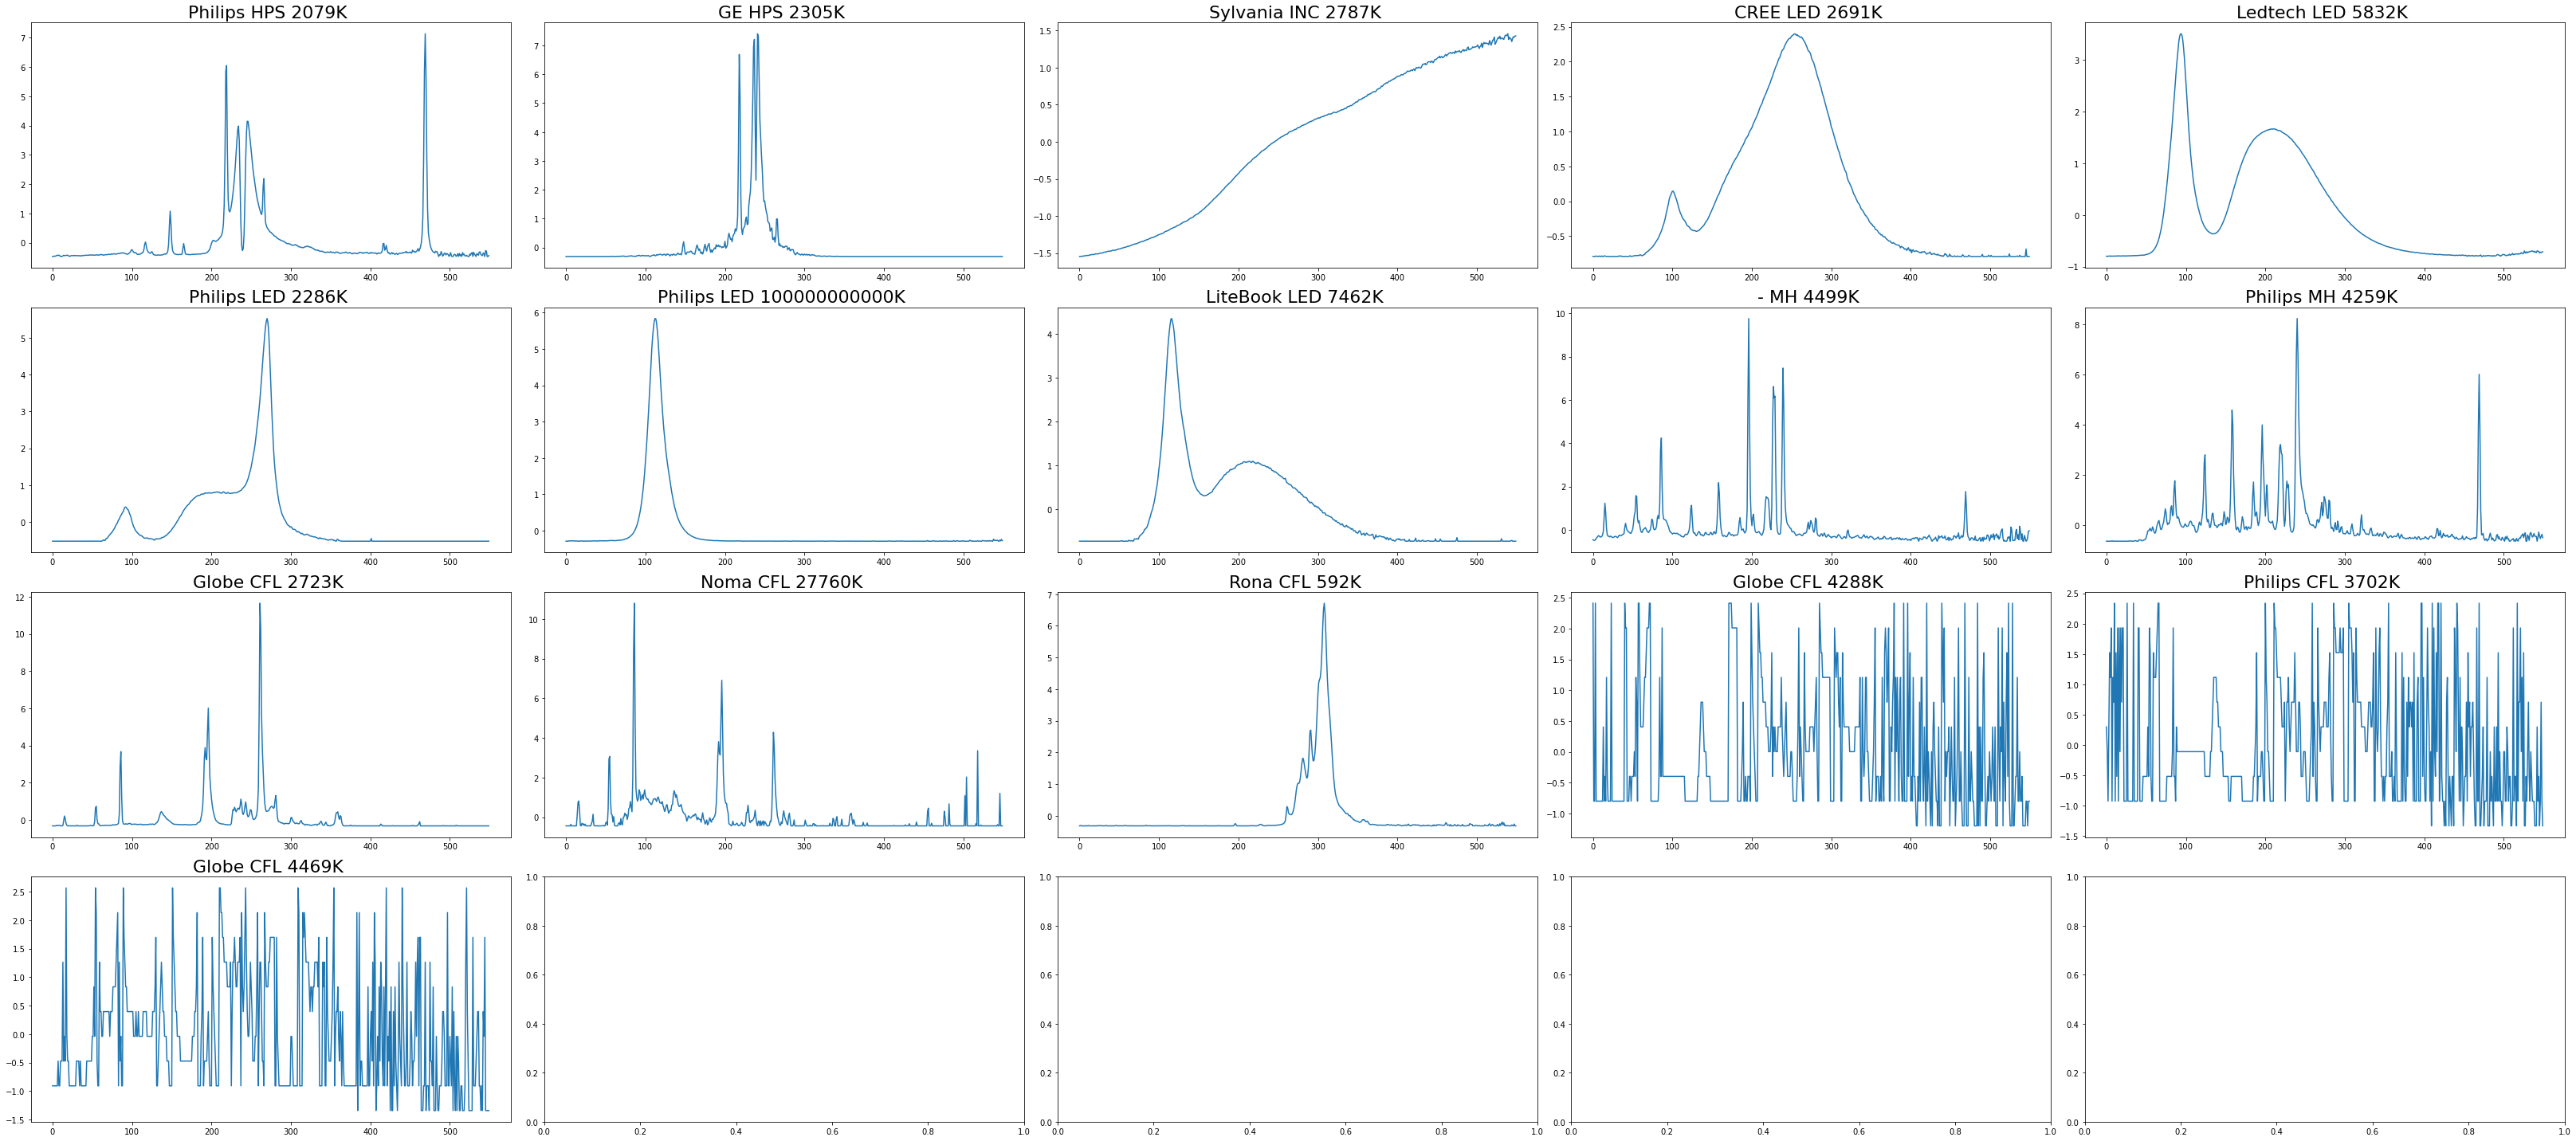

In [8]:
# -- plot LSPDD spectra
fig, ax = plt.subplots(nrows=4, ncols=5, figsize = (45,20))
num = 0
for i in range(0, 4):
  for j in range(0, 5):
    ax[i, j].set_title(name_keep[num], fontsize=22)
    ax[i, j].plot(spec_lspdd_st[num])
    num = num + 1
    if num == len(name_keep):
      break

fig.tight_layout()

In [9]:
# -- let's remove the last three templates, since these three spectra are too noisy
spec_keep = np.array(spec_keep)[:13]
name_keep = np.array(name_keep)[:13]
spec_lspdd_st = np.array(spec_lspdd_st)[:13]

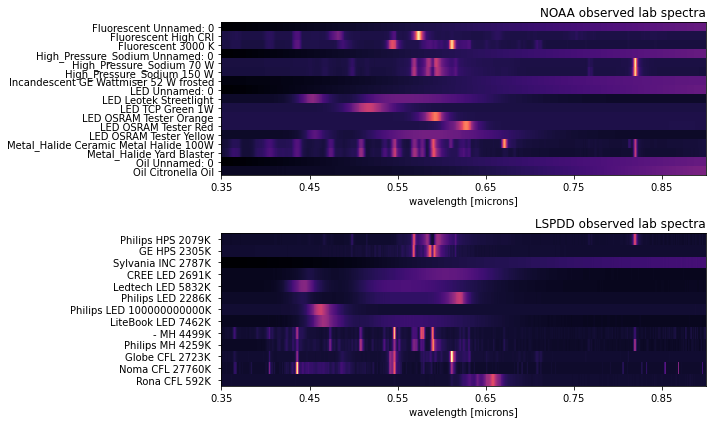

In [10]:
# -- plot all NOAA and LSPDD
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 6))
ax[0].imshow(spectra_st[265:283], aspect="auto", cmap="magma", interpolation="nearest")
ax[0].set_xticks(np.arange(0, len(wave), 100))
ax[0].set_xticklabels(wave[::100])
ax[0].set_yticks(np.arange(len(names[265:283])))
ax[0].set_yticklabels(names[265:283])
ax[0].set_xlabel('wavelength [microns]')
ax[0].set_title("NOAA observed lab spectra", loc='right' )

ax[1].imshow(spec_lspdd_st, aspect="auto", cmap="magma", interpolation="nearest")
ax[1].set_xticks(np.arange(0, len(wave), 100))
ax[1].set_xticklabels(wave[::100])
ax[1].set_yticks(np.arange(len(name_keep)))
ax[1].set_yticklabels(name_keep)
ax[1].set_xlabel('wavelength [microns]')
ax[1].set_title("LSPDD observed lab spectra", loc='right' )
fig.tight_layout()

In [11]:
# -- combine the NOAA and LSPDD templates
spec_all = np.vstack([spec_keep, specs[265:283]]).T
name_all = np.hstack([name_keep, names[265:283]])


# Convert feature matrix into DataFrame
df = pd.DataFrame(spec_all)

# View the data frame
df

# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

# # Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
# # # Drop features 
spec_final = df.drop(df[to_drop], axis=1)
spec_final

/tmp/ipykernel_875731/2037977253.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,0,1,2,3,4,5,6,7,8,9,10,11,12,14,21,22,23,24,26,27
0,0.000002,0.0,0.001986,0.000015,0.000338,0.0,0.000000,0.0,0.000164,0.000000,0.0,0.000000,0.000040,0.000601,0.000036,0.000024,0.000083,0.000029,0.002458,0.002483
1,0.000003,0.0,0.002022,0.000000,0.000177,0.0,0.000000,0.0,0.000113,0.000000,0.0,0.000000,0.000472,0.000625,0.000030,0.000009,0.000053,0.000028,0.003003,0.002922
2,0.000007,0.0,0.002057,0.000000,0.000243,0.0,0.000000,0.0,0.000084,0.000000,0.0,0.000000,0.000213,0.000662,0.000035,0.000005,0.000049,0.000021,0.003598,0.003396
3,0.000010,0.0,0.002131,0.000036,0.000411,0.0,0.000189,0.0,0.000166,0.000000,0.0,0.000000,0.000000,0.000672,0.000047,0.000006,0.000051,0.000024,0.004178,0.003864
4,0.000011,0.0,0.002171,0.000074,0.000482,0.0,0.000410,0.0,0.000312,0.000000,0.0,0.000000,0.000000,0.000673,0.000054,0.000035,0.000048,0.000031,0.004735,0.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.000162,0.0,0.126270,0.001230,0.003169,0.0,0.000018,0.0,0.000000,0.005300,0.0,0.000000,0.000483,0.000230,0.000015,0.000003,0.000873,0.001560,0.007516,0.004002
546,0.000145,0.0,0.127370,0.000000,0.004028,0.0,0.001492,0.0,0.000080,0.002638,0.0,0.000391,0.000000,0.000222,0.000007,0.000001,0.000836,0.001511,0.007744,0.004145
547,0.000000,0.0,0.127060,0.000000,0.003608,0.0,0.000401,0.0,0.000401,0.005052,0.0,0.000000,0.002590,0.000202,0.000004,0.000012,0.000788,0.001458,0.007933,0.004259
548,0.000000,0.0,0.127670,0.000000,0.004099,0.0,0.002330,0.0,0.001121,0.006979,0.0,0.000000,0.000000,0.000230,0.000006,0.000006,0.000721,0.001370,0.008028,0.004335


/tmp/ipykernel_875731/4141002821.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(name_all)


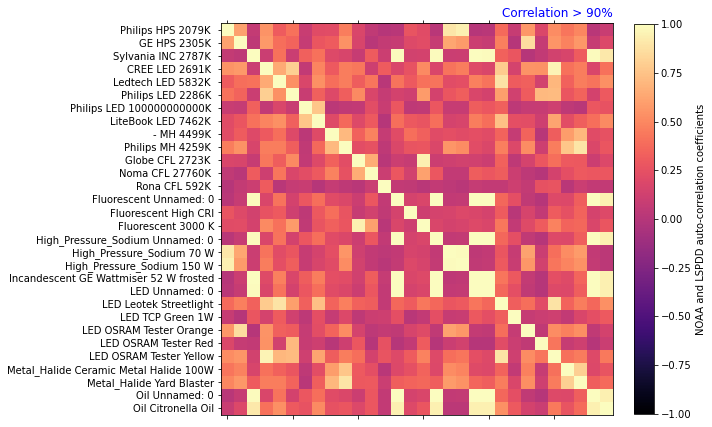

In [12]:
# -- plot the correlation matrix
fig, ax = plt.subplots(figsize = (10, 10))

line = ax.matshow(corr_matrix, cmap = "magma", vmin = -1, vmax=1)
ax.set_yticklabels(name_all)
ax.set_yticks(np.arange(len(name_all)))
ax.set_xticklabels([])
plt.colorbar(line, fraction = 0.045, label = "NOAA and LSPDD auto-correlation coefficients")
ax.set_title('Correlation > 90%', loc = "right", c= "b");

fig.tight_layout()
plt.show()

In [13]:
# -- get index for the final lighting templates
index_final = spec_final.columns

# -- get final filtered names
name_final = []
for num in index_final:
  name_final.append((name_all)[num])

# -- save 
np.save("../output/final_spectra_20.npy", spec_final.T)
np.save("../output/final_name_20.npy", name_final)

In [14]:
# -- load spec for plotting 
spec_final = np.load("../output/final_spectra_20.npy")
name_final = np.load("../output/final_name_20.npy")

In [15]:
# -- standardize lab spectra data
spec_final_st = np.empty(spec_final.shape)
for i in range(0, len(spec_final)):
  st = (spec_final[i] - spec_final[i].mean()) / spec_final[i].std()
  spec_final_st[i, :] = st

In [16]:
# -- load 2018 scan wavelengths
waves1 = np.load("../output/graham_hall_upload/cube1_waves_range.npy")

# -- interpolate filtered lspdd and noaa templates
spectra2 = np.empty((len(spec_final_st), len(waves1)))
for i in range(0, len(spec_final_st)):
  interp = np.interp(waves1, wavelengths, spec_final_st[i])
  spectra2[i,:] = (interp)

Text(1.0, 1.0, 'NOAA and LSPDD observed lab spectra')

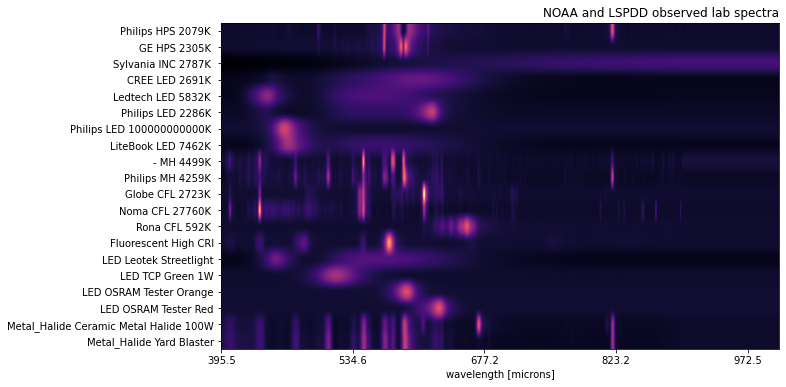

In [17]:
# -- round the waves for plotting
wave1 = round(pd.DataFrame(waves1), 1)

fig, ax = plt.subplots(figsize = (10, 6))
ax.imshow(spectra2, aspect="auto", cmap="magma")
ax.set_xticks(np.arange(0, len(waves1), 200))
ax.set_xticklabels(wave1[::200][0])
ax.set_yticks(np.arange(len(name_final)))
ax.set_yticklabels(name_final)
ax.set_xlabel('wavelength [microns]')
ax.set_title("NOAA and LSPDD observed lab spectra", loc='right' )